# Employee Churn Prediction

## Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Load the dataset
file_path = 'HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Performing statistical analysis

In [3]:
df.shape

(1470, 35)

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- There is no null values are present in the dataset.

In [5]:
# Display summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploratory Data Analysis (Before Preprocessing)

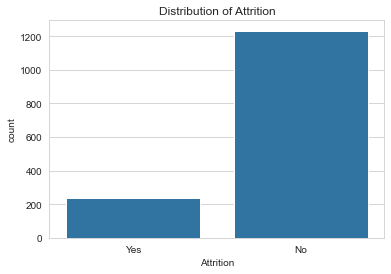

In [6]:
# Visualize the distribution of the target variable (Attrition)
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

- The attrition dataset is imbalance, It can affect the model in future and we need to handle this scenario.

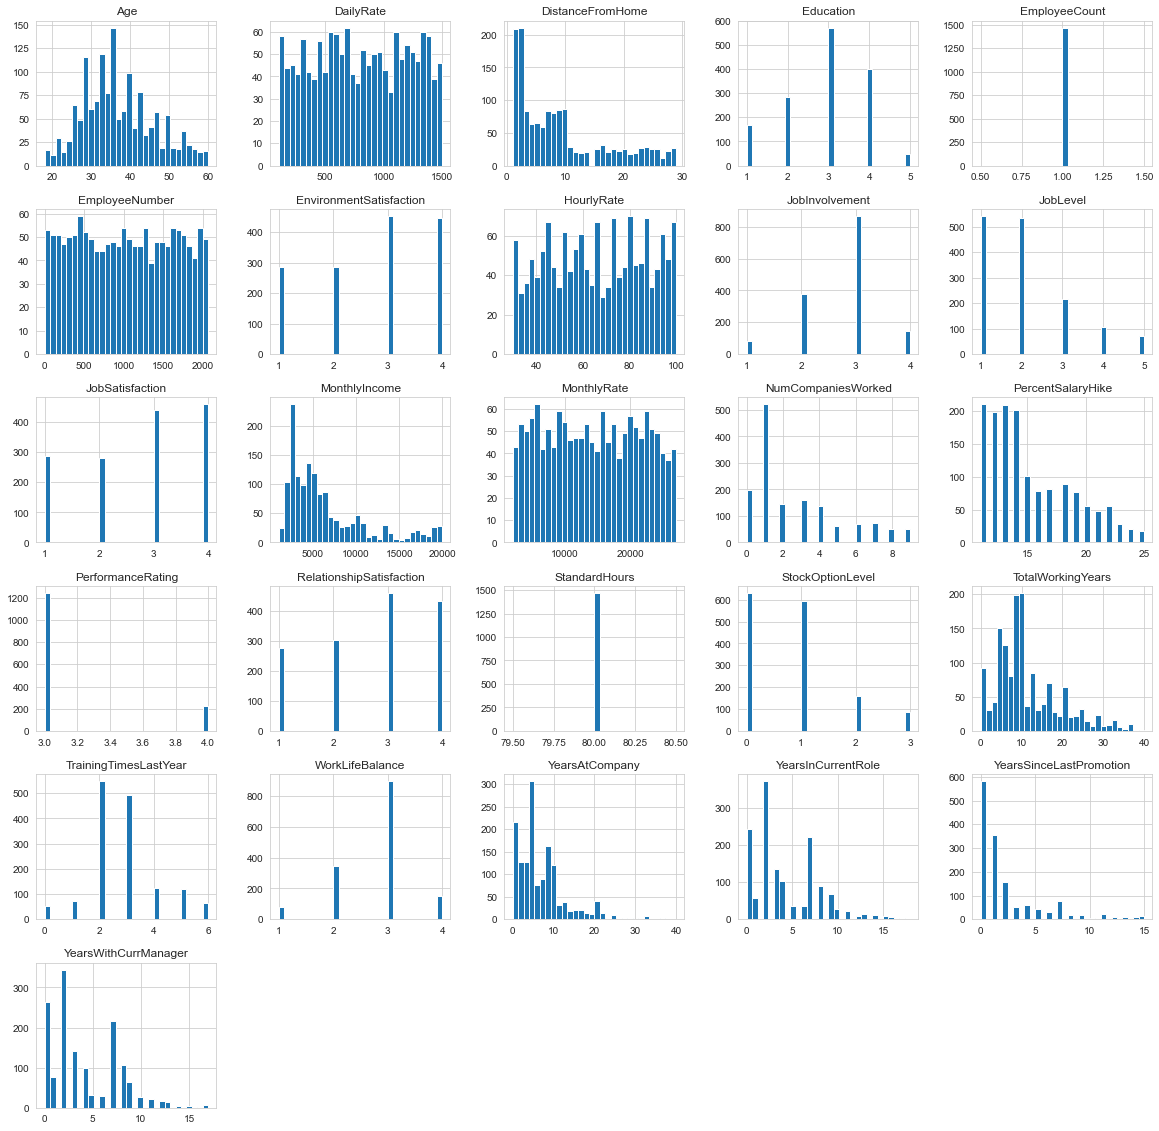

In [7]:
# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(20, 20))
plt.show()

In [8]:
# Encode categorical variables using LabelEncoder
def encode_categorical(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Encode the data
df_encoded, label_encoders = encode_categorical(df)

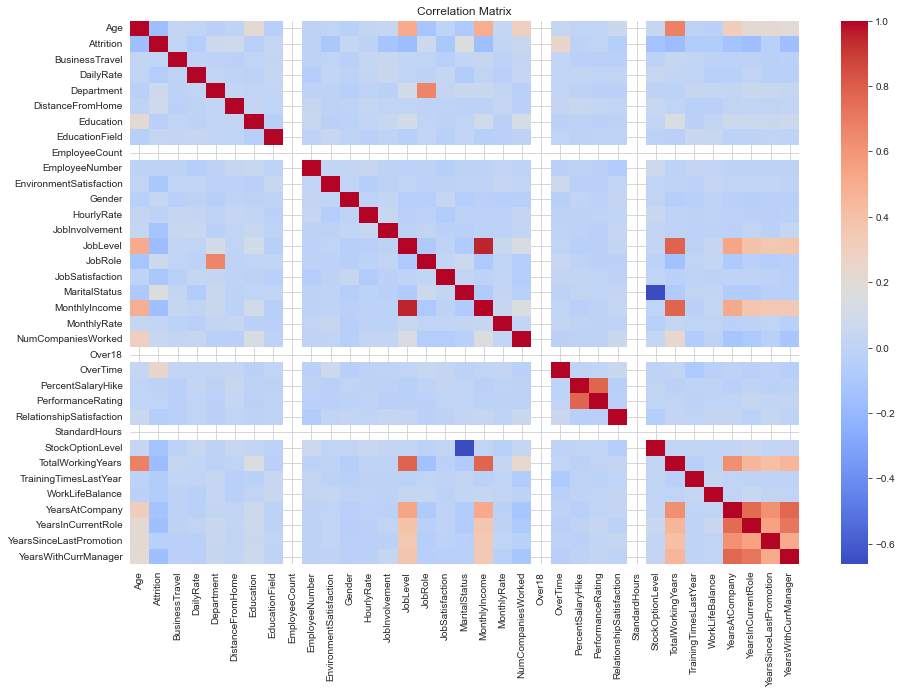

In [9]:
# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [10]:
# Defining functions for preprocessing
def handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values[missing_values > 0])
    # For simplicity, we'll drop any rows with missing values
    df = df.dropna()
    return df

def encode_categorical_variables(df):
    # Encode categorical variables using LabelEncoder
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Preprocess the data
df = handle_missing_values(df)
df, label_encoders = encode_categorical_variables(df)

Missing Values:
 Series([], dtype: int64)


- Handling missing values and encoding the categorical variables so that if the new data have some irregularities then the model should not become underfit or overfit.

In [11]:
# Display the first few rows of the preprocessed dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


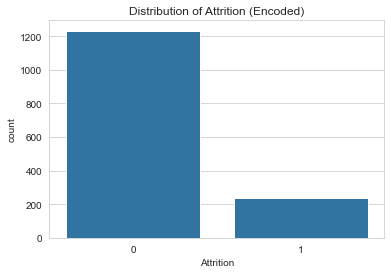

In [12]:
# Visualize the distribution of the target variable (Attrition) after encoding
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition (Encoded)')
plt.show()

- Encoded attrition distribution.

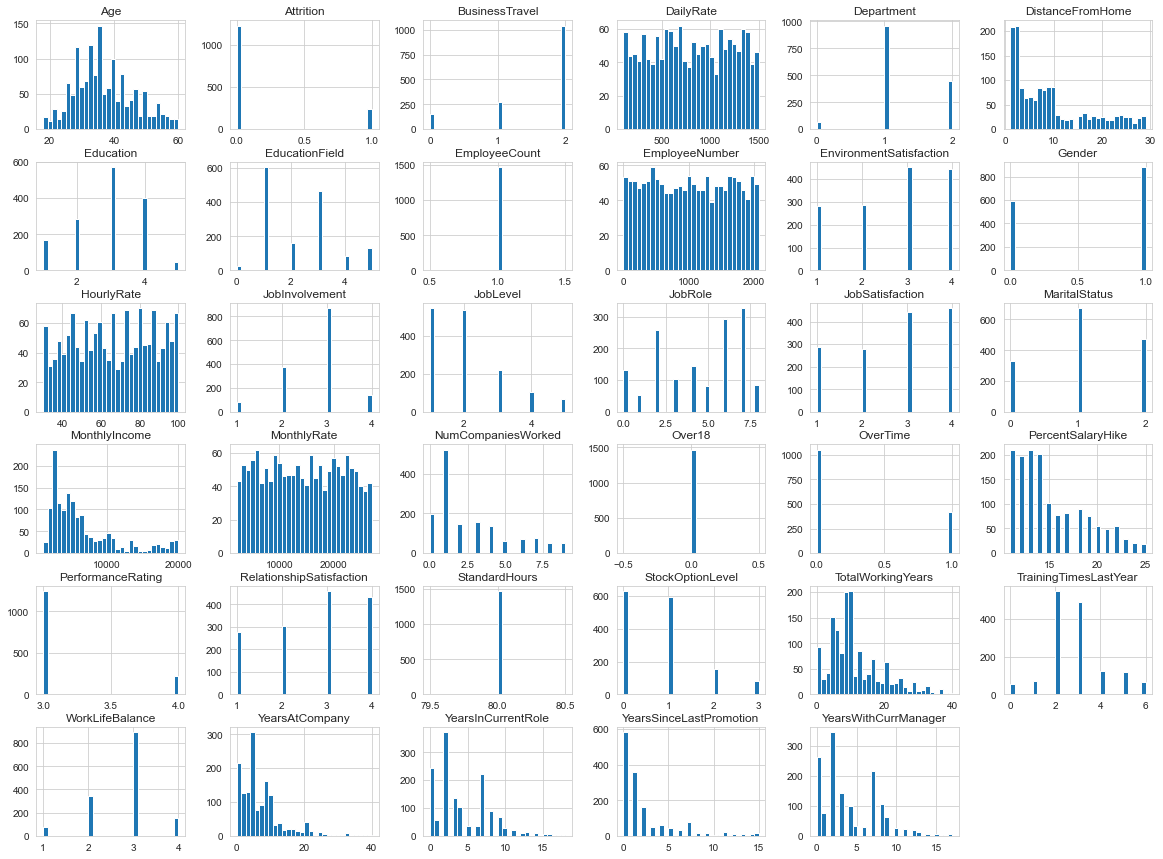

In [13]:
# Visualize the distribution of numerical features after preprocessing
df.hist(bins=30, figsize=(20, 15))
plt.show()

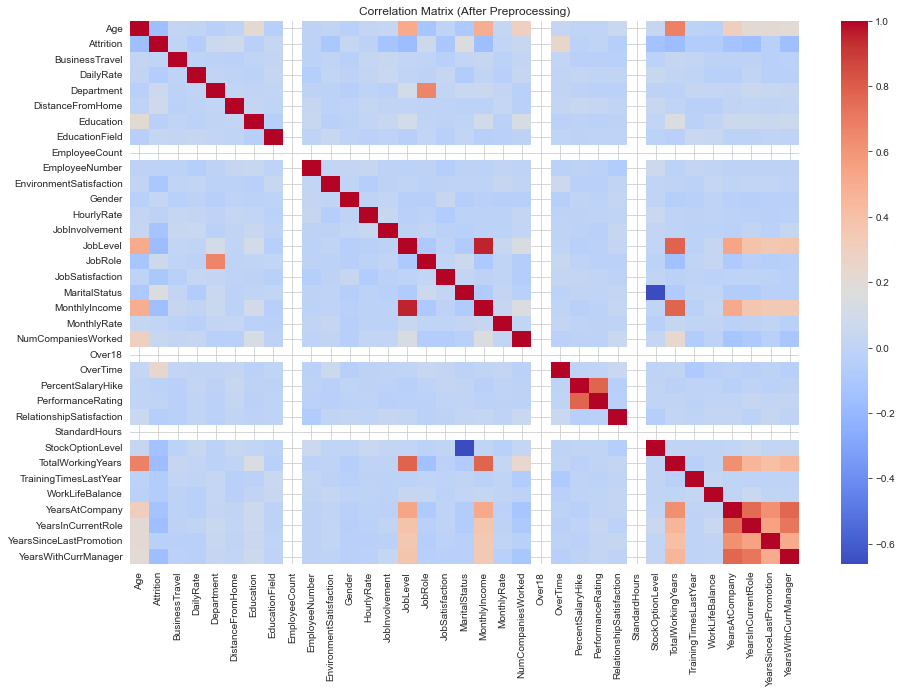

In [14]:
# Visualize the correlation matrix after preprocessing
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix (After Preprocessing)')
plt.show()


## Splitting data for Train and Test

In [15]:
# Defining function for data Split
def split_data(df, test_size=0.2):
    X = df.drop('Attrition', axis=1)
    y = df['Attrition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [16]:
# Split the data
X_train, X_test, y_train, y_test = split_data(df)

- Spilt the data into 80:20 ratio for training and testing dataset

## Model Training and Evaluation

In [17]:
# Defining model training and evaluation function
def train_model_sklearn(X_train, y_train, model_type='logistic'):
    if model_type == 'logistic':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier(random_state=42)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Unsupported model type. Choose from 'logistic', 'decision_tree', or 'random_forest'.")
    
    model.fit(X_train, y_train)
    return model

def evaluate_model_sklearn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy}\n')
    print(f'Precision: {precision}\n')
    print(f'Recall: {recall}\n')
    print(f'F1 Score: {f1}\n')
    print(f'Classification Report:\n{report}')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Logistic Regression Model:
Accuracy: 0.8673469387755102

Precision: 0.5

Recall: 0.1282051282051282

F1 Score: 0.20408163265306123

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



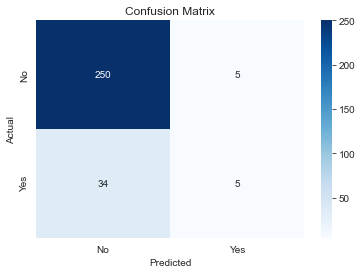

In [18]:
# Train and evaluate logistic regression model
model_logistic = train_model_sklearn(X_train, y_train, model_type='logistic')
print("Logistic Regression Model:")
evaluate_model_sklearn(model_logistic, X_test, y_test)

- Logistic Regression Models Accuracy is 0.86734.

Decision Tree Model:
Accuracy: 0.7653061224489796

Precision: 0.1590909090909091

Recall: 0.1794871794871795

F1 Score: 0.1686746987951807

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       255
           1       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294



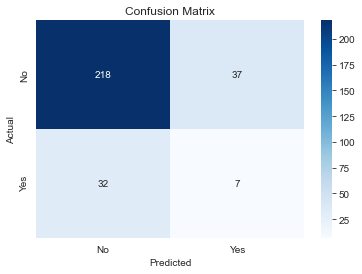

In [19]:
# Train and evaluate decision tree model
model_decision_tree = train_model_sklearn(X_train, y_train, model_type='decision_tree')
print("Decision Tree Model:")
evaluate_model_sklearn(model_decision_tree, X_test, y_test)

- Decision Tree Model Accuracy is 0.76530.

Random Forest Model:
Accuracy: 0.8673469387755102

Precision: 0.5

Recall: 0.10256410256410256

F1 Score: 0.1702127659574468

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



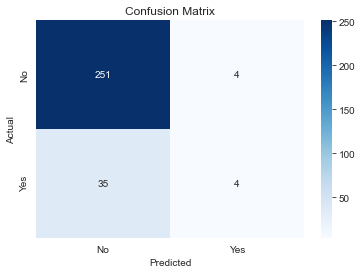

In [20]:
# Train and evaluate random forest model
model_random_forest = train_model_sklearn(X_train, y_train, model_type='random_forest')
print("Random Forest Model:")
evaluate_model_sklearn(model_random_forest, X_test, y_test)

- Random Forest Model Accuracy is 0.86734.

<!-- 

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# def initialize_weights(n_features):
#     weights = np.zeros(n_features)
#     bias = 0
#     return weights, bias

# def compute_cost(y, y_pred):
#     m = len(y)
#     cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
#     return cost

# def train_model_from_scratch(X_train, y_train, learning_rate=0.01, epochs=1000):
#     m, n = X_train.shape
#     weights, bias = initialize_weights(n)
#     for epoch in range(epochs):
#         linear_model = np.dot(X_train, weights) + bias
#         y_pred = sigmoid(linear_model)
#         dw = (1/m) * np.dot(X_train.T, (y_pred - y_train))
#         db = (1/m) * np.sum(y_pred - y_train)
#         weights -= learning_rate * dw
#         bias -= learning_rate * db
#         if epoch % 100 == 0:
#             cost = compute_cost(y_train, y_pred)
#             print(f'Epoch {epoch}: Cost {cost}')
#     return weights, bias

# def predict_from_scratch(X, weights, bias):
#     linear_model = np.dot(X, weights) + bias
#     y_pred = sigmoid(linear_model)
#     return [1 if i > 0.5 else 0 for i in y_pred]

# def evaluate_model_from_scratch(X_test, y_test, weights, bias):
#     y_pred = predict_from_scratch(X_test, weights, bias)
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
#     print(f'Accuracy: {accuracy}\n')
#     print(f'Classification Report:\n{report}')
    
#     # Confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

# # Train and evaluate the model without using scikit-learn
# weights, bias = train_model_from_scratch(X_train.to_numpy(), y_train.to_numpy())
# evaluate_model_from_scratch(X_test.to_numpy(), y_test.to_numpy(), weights, bias) -->

### Insights
- Out of all the Churn Prediction Model, Logistic Regression and Random Forest show the highest accuracy.
- Our model has predicted **True Positive** (Actual No & Predicted No) correctly, but due to the dataset's imbalanced nature, the model has not performed well for **False Negative** (Actual Yes & Predicted No).

## Handling Imbalance data for accurate prediction

In [21]:
# Check class distribution
class_distribution = df['Attrition'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64


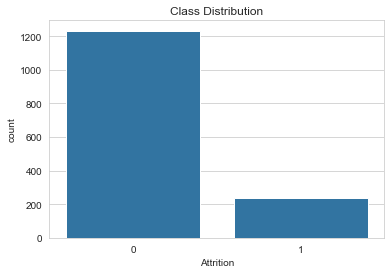

In [22]:
# Plot class distribution
sns.countplot(x='Attrition', data=df)
plt.title('Class Distribution')
plt.show()

In [23]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
new_class_distribution = pd.Series(y_train_res).value_counts()
new_class_distribution = pd.DataFrame(new_class_distribution)
print("New Class Distribution After SMOTE:\n", new_class_distribution)

New Class Distribution After SMOTE:
            count
Attrition       
0            978
1            978


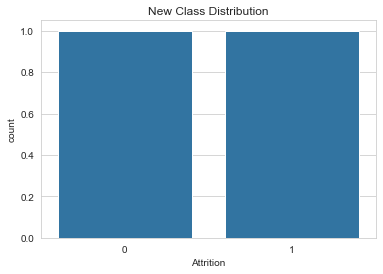

In [24]:
# Plot new class distribution
sns.countplot(x='Attrition', data=new_class_distribution)
plt.title('New Class Distribution')
plt.show()

Logistic Regression Model with Balanced Data:
Accuracy: 0.7687074829931972

Precision: 0.2898550724637681

Recall: 0.5128205128205128

F1 Score: 0.37037037037037035

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       255
           1       0.29      0.51      0.37        39

    accuracy                           0.77       294
   macro avg       0.60      0.66      0.61       294
weighted avg       0.83      0.77      0.79       294



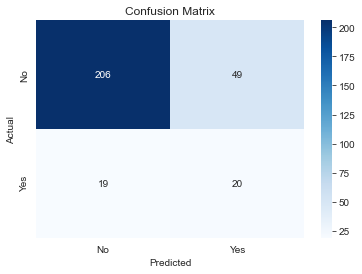

In [25]:
# Train logistic regression model with balanced data
model_logistic_balanced = train_model_sklearn(X_train_res, y_train_res, model_type='logistic')
print("Logistic Regression Model with Balanced Data:")
evaluate_model_sklearn(model_logistic_balanced, X_test, y_test)

- Logistic Regression Model with Imbalanced Data Accuracy is 0.86734.
- Logistic Regression Model with Balanced Data Accuracy is 0.76780.

Decision Tree Model with Balanced Data:
Accuracy: 0.7312925170068028

Precision: 0.19696969696969696

Recall: 0.3333333333333333

F1 Score: 0.24761904761904763

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       255
           1       0.20      0.33      0.25        39

    accuracy                           0.73       294
   macro avg       0.54      0.56      0.54       294
weighted avg       0.79      0.73      0.76       294



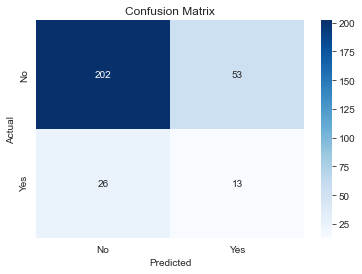

In [26]:
# Train decision tree model with balanced data
model_decision_tree_balanced = train_model_sklearn(X_train_res, y_train_res, model_type='decision_tree')
print("Decision Tree Model with Balanced Data:")
evaluate_model_sklearn(model_decision_tree_balanced, X_test, y_test)

- Decision Tree Model with Imbalanced Data Accuracy is 0.76530.
- Decision Tree Model with Balanced Data Accuracy is 0.73129.

Random Forest Model with Balanced Data:
Accuracy: 0.8605442176870748

Precision: 0.46153846153846156

Recall: 0.3076923076923077

F1 Score: 0.36923076923076925

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.31      0.37        39

    accuracy                           0.86       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294



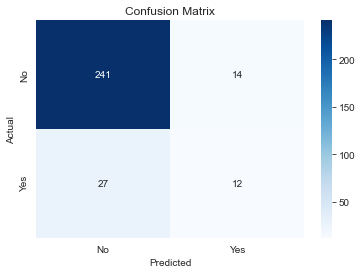

In [27]:
# Train random forest model with balanced data
model_random_forest_balanced = train_model_sklearn(X_train_res, y_train_res, model_type='random_forest')
print("Random Forest Model with Balanced Data:")
evaluate_model_sklearn(model_random_forest_balanced, X_test, y_test)

- Random Forest Model with Imbalanced Data Accuracy is 0.86734.
- Random Forest Model with Balanced Data Accuracy is 0.86054.

### Insights

- As per the previous analysis with Imbalanced data, Logistic Regression and Random Forest were the best-fit models for our churn prediction, because the accuracy of both models was 0.86734.
- But as per the current analysis with Balanced data, only the Random Forest model performed well with an accuracy of 0.86054 which is not very different from the Imbalanced data accuracy.
- We can also conclude that the Decision Tree model is the only model that gave nearly the same accuracy for both the Imbalanced and Balanced dataset.
- ***Hence, we can finally use the Random Forest model over the Logistic Regression and Decision Tree model for our Employee Churn Prediction.***